In [12]:
# import rozneho potrebneho...

%load_ext autoreload
%autoreload

%matplotlib nbagg

import numpy as np
from scipy.integrate import odeint

import sys
sys.path.append('./misc/')

from figFcns_nb import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Príklad realizácie niektorých úloh cvičenia prvého

Uvažujme riadený systém v tvare
	\begin{equation}
		\dot{x}(t) = a\, x(t) + u(t) \label{sustavaNaCv}
	\end{equation}
	kde $x(t)$ je stavová veličina sytému, $u(t)$ je akčný zásah (výstup) regulátora. Parameter $a$ je neznáma konštanta.    

Funkcia, ktorá realizuje diferenciálnu rovnicu riadeného systému, nech je v nasledujúcom tvare, kde sa hneď aj predpokladá, že $u(t)=0$.

In [13]:
def fcn_difRovnice_01(x, t, param_a):

    a = param_a

    u = 0

    dotx = a*x + u

    return dotx

Zostavme simulačnú schému pre riadený systém. Zvoľme konkrétnu hodnotu parametra $a$ tak aby riadený systém bol stabilný. Nech začiatočný stav je $x(0) = 1$ a $u(t)=0$. Simuláciou (pre vhodný časový úsek) ukážme, že $x = 0$ je rovnovážny stav riadeného systému.

Simulačnú schému nech realizuje nasledujúca funkcia:

In [14]:
def fcn_simSch_01(t_start, t_final, T_s, param_a):

    #-----------------------------------------
    t_log = np.arange(sim_t_start, sim_t_final+sim_T_s, sim_T_s).reshape(-1,1)

    #-----------------------------------------
    x_0 = 1

    #-----------------------------------------
    odeOut = odeint(fcn_difRovnice_01,
                    x_0,
                    t_log[:,0],
                    args=(param_a,)
                    )

    return [t_log, odeOut]

Nastavme a spustime simuláciu:

In [15]:
# Nastavenia simulacie

sim_t_start = 0
sim_t_final = 3
sim_T_s = 0.1

param_a = 30


# Simulacia

t_log, x_log, = fcn_simSch_01(sim_t_start, sim_t_final, sim_T_s, param_a)

Všetko potrebné je teraz zaznamenáné v premenných  ```t_log``` a ```x_log```. Nakreslime obrázok (pre prehľadnosť je kód kreslenia obrázku v samostatnom súbore a nie priamo tu v nasledujúcej bunke):

<IPython.core.display.Javascript object>


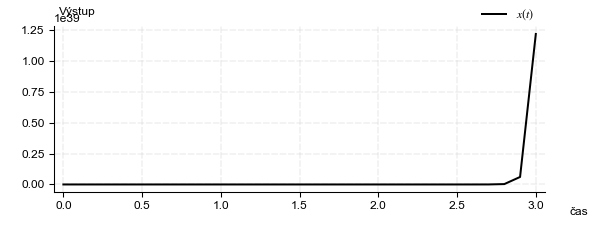

In [16]:
# Obrazok
execfile('misc/figsc_00_nb.py')

V prípade, že parameter $a$ je zvolený tak aby bol riadený systém nestabilný, výsledok je:

In [17]:
param_a = 1

# Simulacia

t_log, x_log, = fcn_simSch_01(sim_t_start, sim_t_final, sim_T_s, param_a)

<IPython.core.display.Javascript object>


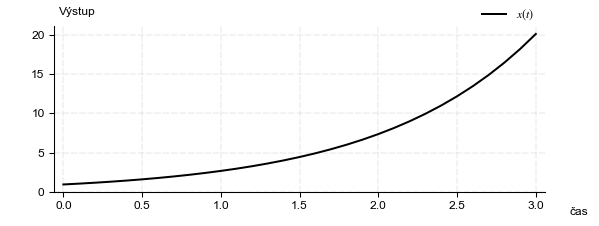

In [18]:
# Obrazok
execfile('misc/figsc_01_nb.py')

Nech začiatočný stav riadeného systému je $x(0) = 1$. Ponechajme konkrétnu hodnotu parametra $a$ tak aby riadený systém bol nestabilný. Pridajme k riadenému systému riadiaci systém daný nasledovne:
	\begin{equation}
		u = -k\, x; \qquad \dot{k} = x^2
	\end{equation}
Simuláciou vyšetrime stabilitu URO.

Funkcia, ktorá realizuje potrebné diferenciálne rovnice nech je nasledovná:

In [19]:
def fcn_difRovnice_02(x, t, param_a):

    x, k = x

    a = param_a

    dotk = x**2

    u = -k*x

    dotx = a*x + u

    return [dotx, dotk]

Simulačná schéma, opäť realizovaná ako funkcia:

In [20]:
def fcn_simSch_02(t_start, t_final, T_s, param_a):

    #-----------------------------------------
    t_log = np.arange(sim_t_start, sim_t_final+sim_T_s, sim_T_s).reshape(-1,1)

    #-----------------------------------------
    x_0 = [1, 0]

    #-----------------------------------------
    odeOut = odeint(fcn_difRovnice_02,
                    x_0,
                    t_log[:,0],
                    args=(param_a,)
                    )

    return [t_log, odeOut]

Nastavenie a spustenie simulácie, pričom pripomeňme, že parameter $a$ je stále nastavený tak, aby riadený systém bol nestabilný.

In [21]:
# Nastavenia simulacie

sim_t_start = 0
sim_t_final = 5
sim_T_s = 0.05


# Simulacia

t_log, x_log, = fcn_simSch_02(sim_t_start, sim_t_final, sim_T_s, param_a)

Obrázok, ktorý zobrazuje okrem výstupnej veličiny riadeného systému aj iné veličiny potrebné pre posúdenie stability celého uzavretého regulačného obvodu.

<IPython.core.display.Javascript object>


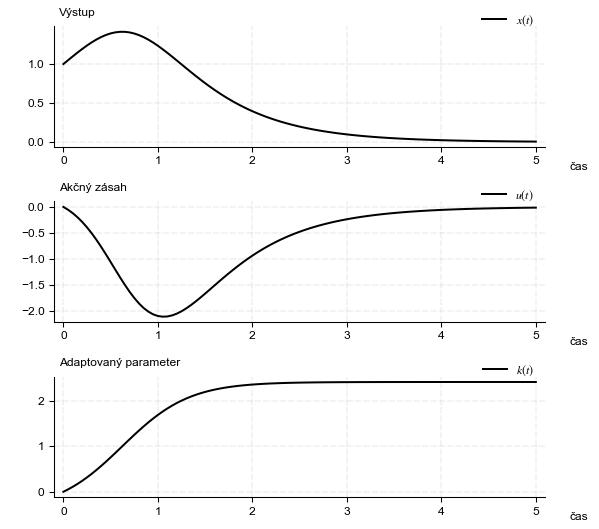

In [22]:
# Obrazok
execfile('misc/figsc_02_nb.py')

Cieľ riadenia je splnený, čo v tomto prípade znamená, že výstupná veličina sa približuje k nulovej hodnote, a všetky signály uzavretého regulačného obvodu sú ohraničené. To znamená, že URO je stabilný.

Podrobnejšia diaskusia z pohľadu Adaptívneho riadenia je nad rámec týchto krátkych poznámok.